### Monte Carlos - discretização de EULER

* Seguem respostas sugeridas (geralmente há várias maneiras de resolver um problema em Python).*

[*********************100%%**********************]  1 of 1 completed


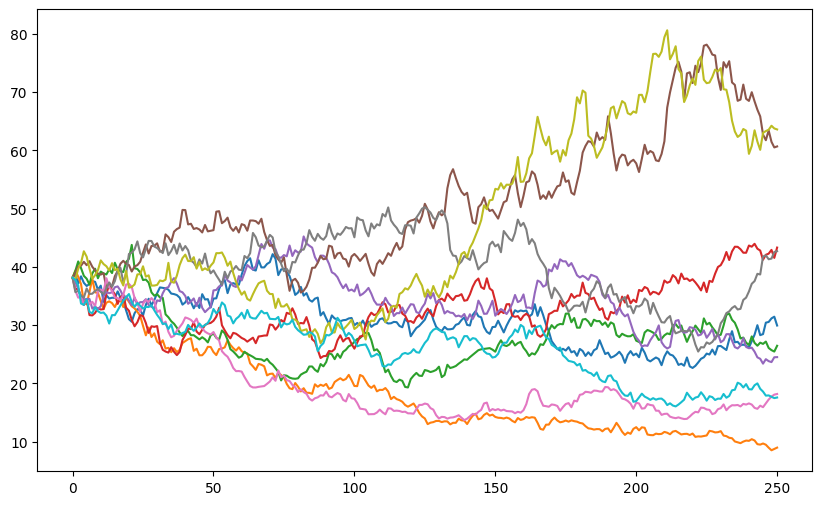

In [44]:
import numpy as np  
import pandas as pd  
import yfinance as yf  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

ticker = 'PETR4.SA'  
data = yf.download(ticker, start='2014-11-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
stdev = log_returns.std() * 250 ** 0.5


r = 0.025
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])


plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [45]:
log_returns.tail()

Date
2024-07-08    0.024224
2024-07-09   -0.000260
2024-07-10   -0.009412
2024-07-11    0.006806
2024-07-12   -0.004707
Name: Adj Close, dtype: float64

<Axes: xlabel='Date'>

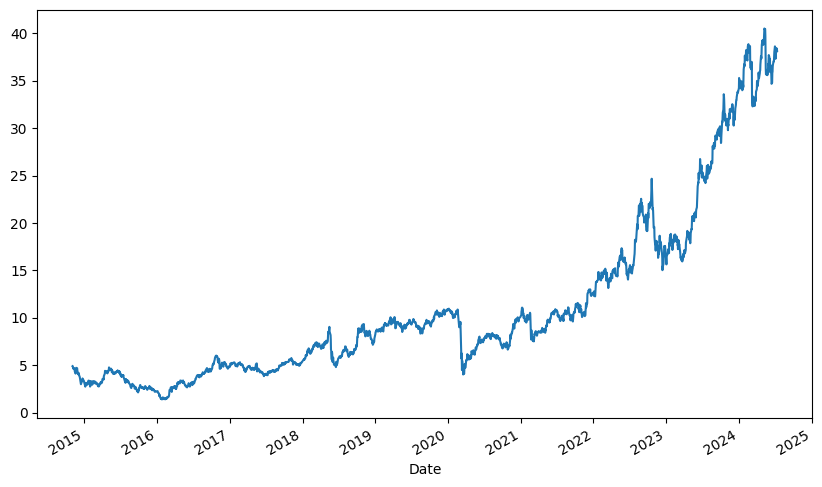

In [46]:
data.plot(figsize=(10, 6))

Use numpy.maximum para criar um vetor com tantos elementos quantas colunas houver na matriz S.

In [47]:
p = np.maximum(S[-1] - 110, 0)

In [48]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [49]:
p.shape

(10000,)

Use a fórmula a seguir para prever o preço de uma opção de ação.

$$
C = \frac{exp(-r \cdot T) \cdot \sum{p_i}}{iterations}
$$

In [50]:
np.sum(p)

1964.0325538687155

In [51]:
C = np.exp(-r * T) * np.sum(p) / iterations

C

0.19155404173344784

Como esse modelo de precificação é baseado em iterações aleatórias, você obterá um resultado diferente sempre que executar novamente o código deste documento. Expanda a lista “Kernel” no menu Jupyter e clique em “Reiniciar e executar todas”/”Reiniciar e executar todas as células” para verificar se isso é verdade.